In [1]:
# Please enter in inches unit

pallet_l = 48
pallet_b = 40
pallet_h = 60

box_l = 22.7
box_b = 14.9
box_h = 14.3

In [2]:
from gurobipy import *

**Sets**<br>
$\begin{aligned}
& \mathcal{I} = 1, 2,\dots,\lfloor pallet_l/Box_b \rfloor\\
& \mathcal{J} = 1, 2,\dots,\left\lfloor \frac{pallet_b}{Box_b} \right\rfloor\\
\end{aligned}$


**Parameters**<br>
$ Box_l $: Length of the Box<br>
$ Box_b $: Width of the Box<br>
$ pallet_l $: Length of the Pallet<br>
$ pallet_b $: Breadth of the Pallet<br>

**Variables**<br>
$ yl_{i,j} $: Is 1 if length of the box aligns along length of the pallet in slot i,j <br>
$ yb_{i,j} $: Is 1 if breadth of the box aligns along length of the pallet in slot i,j

$$ \begin{aligned}
\max_{yl, yb} \quad & \sum_{i \in I, \; j \in J}yl_{i,j} + \sum_{i \in I}\sum_{j \in J}yb_{i,j}\\
\forall \; j \in J \quad & Box_l\sum_{i} yl_{i,j} + Box_b\sum_{i} yb_{i,j} \leq pallet_l\\
\forall \; i \in I \quad & Box_l\sum_{j} yb_{i,j} + Box_b\sum_{j} yl_{i,j} \leq pallet_b\\
\forall \; j \in J\;\forall \; i \in I \quad & yl_{i,j} + yb_{i,j} \leq 1
\end{aligned} $$

In [3]:
set_I = [i for i in range(1, int(pallet_l / box_b) + 1)]
set_J = [j for j in range(1, int(pallet_b / box_b) + 1)]

m = Model()
y_l = m.addVars(set_I, set_J, name="y_l", vtype=GRB.BINARY)
y_b = m.addVars(set_I, set_J, name="y_b", vtype=GRB.BINARY)

#m.setObjective(pallet_l * pallet_b - (y_l.sum() + y_b.sum()) * (box_l * box_b), GRB.MINIMIZE) # Minimized unused area
m.setObjective(y_l.sum() + y_b.sum(), GRB.MAXIMIZE) # Maximized number of boxes

con_l = m.addConstrs((box_l * y_l.sum('*', j) + box_b * y_b.sum('*', j) <= pallet_l for j in set_J), "Con_l")
con_b = m.addConstrs((box_b * y_l.sum(i, '*') + box_l * y_b.sum(i, '*') <= pallet_b for i in set_I), "Con_b")
con_unique = m.addConstrs((y_l[i, j] + y_b[i, j] <= 1 for i in set_I for j in set_J), "Con_unique")

m.Params.LogToConsole = 0
m.optimize()

for i in set_I:
    for j in set_J:
        print('i = ', i, 'j = ', j, 'solution = ', y_l[i, j].x)
        
print("=" * 70)

for i in set_I:
    for j in set_J:
        print('i = ', i, 'j = ', j, 'solution = ', y_b[i, j].x)
        
print("=" * 70)

for j in set_J:
    sol = []
    
    for i in set_I:
        if y_l[i, j].x == 1:
            sol.append("L")
        elif y_b[i, j].x == 1:
            sol.append("B")
        else:
            sol.append("0")
            
    print(sol)
    
print(sum(y_l[i, j].x + y_b[i, j].x for i in set_I for j in set_J))
print(int(pallet_h/box_h))

Set parameter Username
Academic license - for non-commercial use only - expires 2022-06-27
i =  1 j =  1 solution =  1.0
i =  1 j =  2 solution =  -0.0
i =  2 j =  1 solution =  -0.0
i =  2 j =  2 solution =  -0.0
i =  3 j =  1 solution =  1.0
i =  3 j =  2 solution =  -0.0
i =  1 j =  1 solution =  0.0
i =  1 j =  2 solution =  1.0
i =  2 j =  1 solution =  0.0
i =  2 j =  2 solution =  1.0
i =  3 j =  1 solution =  0.0
i =  3 j =  2 solution =  1.0
['L', '0', 'L']
['B', 'B', 'B']
5.0
4


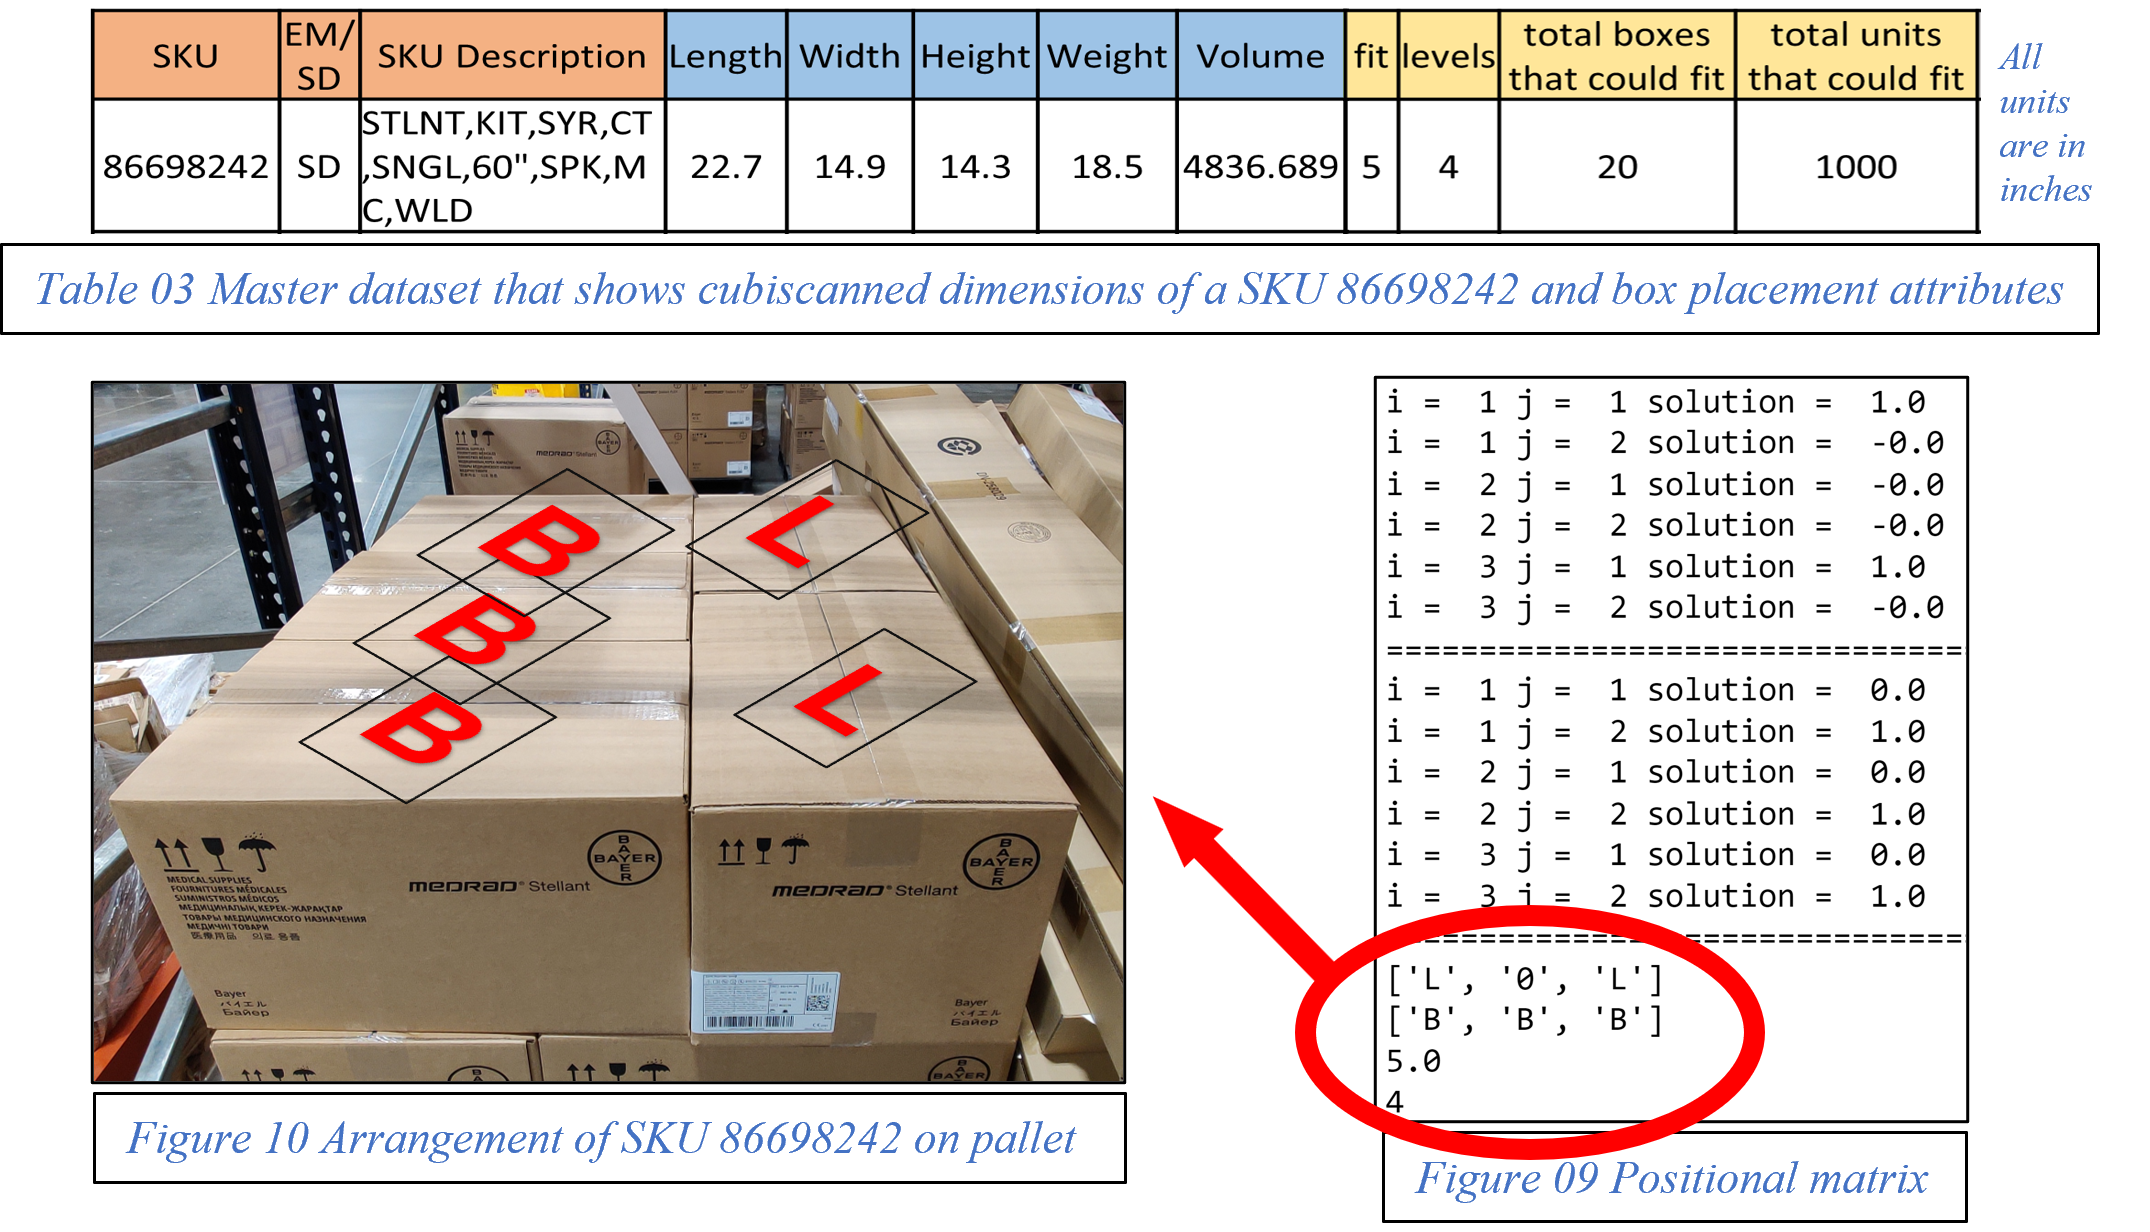